# Pymaceuticals Inc.
---

### Analysis
The size of the tumor had a correlation with the size of the mouse.  The bigger the mouse the larger the tumor could grow.  It did appear that Capomulin drug treatment had the greatest impact on the size of the tumor.  The mice that were treated with Capomulin had smaller tumors.  Capomulin and Ramicane had the highest number of uses, while Propiva had the fewest number of uses.  

Jesse Rivera
- 
 

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st



# Study data files
mouse_metadata_path = "C:/Users/jariv/Matplotlib Challenge Mod 5/Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "C:/Users/jariv/Matplotlib Challenge Mod 5/Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
#print(mouse_metadata.info())
#print(mouse_metadata.shape)
study_results = pd.read_csv(study_results_path)
#print(study_results.info())
#print(study_results.shape)
# Combine the data into a single DataFrame
mouseD_results_complete_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
y_label_text = "z_label"
# Display the data table for preview
mouseD_results_complete_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mouse_count = mouseD_results_complete_df["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

filter = mouseD_results_complete_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)
duplicated_mouse = mouseD_results_complete_df[filter] 
#duplicated_mouse.info()
duplicated_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = duplicated_mouse['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = mouseD_results_complete_df[mouseD_results_complete_df["Mouse ID"].isin(duplicate_mouse_ids)==False]

print("Clean data\n", clean_df)


Clean data
      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  


In [6]:
# Checking the number of mice in the clean DataFrame.
print(f'Number of Mice after cleaning:',len(clean_df.groupby('Mouse ID').count()))
#clean_df.info()
clean_df.head()

Number of Mice after cleaning: 248


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
#print(type(clean_df))
#print(clean_df.shape)
#print(clean_df.describe())
#print(clean_df.info())
#print(type(tumor_volume))
tumor_volume_mean = tumor_volume.mean()
tumor_volume_median = tumor_volume.median()
tumor_volume_var = tumor_volume.var()
tumor_volume_std = tumor_volume.std()
tumor_volume_stderr = tumor_volume.sem()

# Assemble the resulting series into a single summary DataFrame.
results_df = pd.DataFrame({"Mean Tumor Volume": tumor_volume_mean,
                           "Median Tumor Volume": tumor_volume_median,
                           "Tumor Volume Variance": tumor_volume_var,
                           "Tumor Volume Std. Dev.": tumor_volume_std,
                           "Tumor Volume Std. Err.": tumor_volume_stderr})
results_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
print(results_df.describe())

       Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
count          10.000000            10.000000              10.000000   
mean           50.975982            49.902123              47.858440   
std             5.621289             4.705415              16.008423   
min            40.216745            40.673236              23.486704   
25%            52.388490            50.778739              40.249804   
50%            53.060651            51.819532              46.192684   
75%            54.183257            52.396036              60.738703   
max            55.235638            53.698743              68.553577   

       Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
count               10.000000               10.000000  
mean                 6.821103                0.502785  
std                  1.216096                0.103473  
min                  4.846308                0.320955  
25%                  6.342952                0.475424  
50%            

## Bar and Pie Charts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Placebo'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

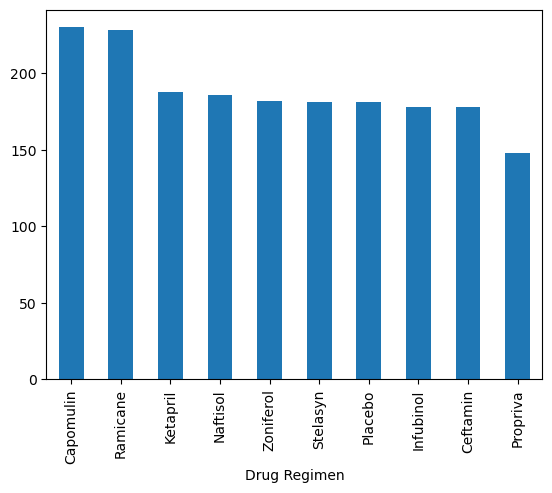

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_df["Drug Regimen"].value_counts().plot(kind='bar')

plt.xticks(rotation='vertical')


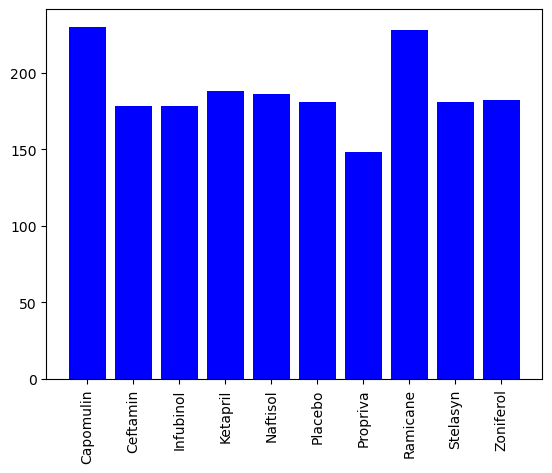

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_df.groupby("Drug Regimen").count()['Mouse ID']
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='blue')
plt.xticks(rotation='vertical')

plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

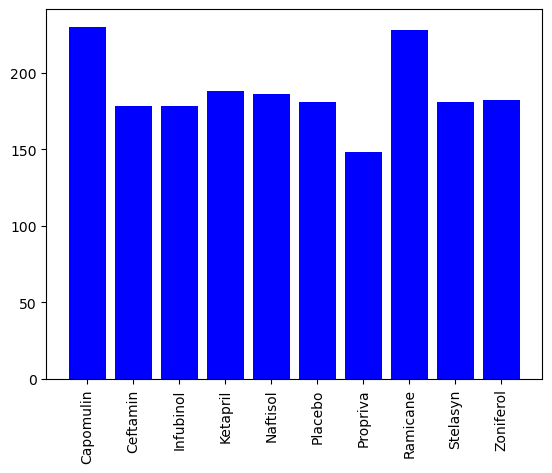

In [11]:
drug_regimen_counts = clean_df.groupby("Drug Regimen").count()['Mouse ID']
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='blue')
plt.xticks(rotation='vertical')

Sex
Male      958
Female    922
Name: count, dtype: int64


Text(0, 0.5, 'Sex')

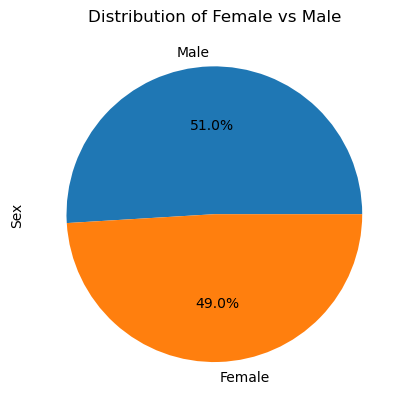

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fem_vs_male = clean_df["Sex"].value_counts()
print(fem_vs_male)
fem_vs_male.plot(kind='pie', y='Sex', autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Female vs Male')
plt.ylabel('Sex')

Text(0, 0.5, 'Sex')

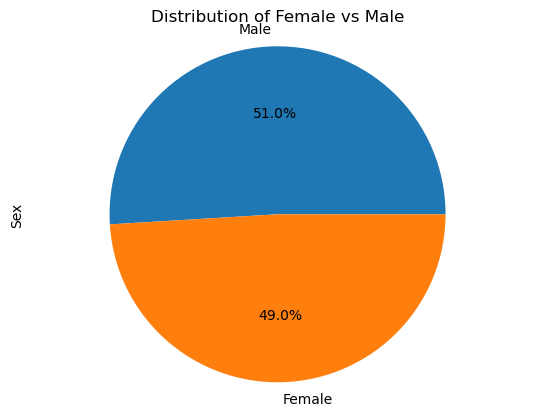

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male', 'Female'
sizes = [958,922]
explode=(0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Female vs Male')
ax1.axis('equal')
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = clean_df.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max().reset_index()

greatest_timepoint_df


,Drug Regimen,Mouse ID,Timepoint
0,Capomulin,b128,45
1,Capomulin,b742,45
2,Capomulin,f966,20
3,Capomulin,g288,45
4,Capomulin,g316,45
...,...,...,...
243,Zoniferol,q633,45
244,Zoniferol,s337,45
245,Zoniferol,w140,5
246,Zoniferol,w575,45


In [15]:
#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.DataFrame(greatest_timepoint_df)
final_tumor_volume_df = pd.merge(greatest_timepoint_df, clean_df, on=('Drug Regimen', 'Mouse ID', 'Timepoint'), how='left')
#greatest_tp_df.info()
final_tumor_volume_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
243,Zoniferol,q633,45,70.827796,2,Male,12,25
244,Zoniferol,s337,45,62.109651,4,Male,14,27
245,Zoniferol,w140,5,47.717952,0,Female,19,30
246,Zoniferol,w575,45,68.401286,3,Female,16,28


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

drug_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in drug_treatments: 

    drug_vol = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]

    # add subset 
    tumor_vol.append(drug_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_vol.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = drug_vol.loc[(drug_vol < lower_bound) | (drug_vol > upper_bound)]

    print(f"{treatment}'s Potential Outliers for:{outliers}")



Capomulin's Potential Outliers for:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's Potential Outliers for:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's Potential Outliers for:55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's Potential Outliers for:Series([], Name: Tumor Volume (mm3), dtype: float64)


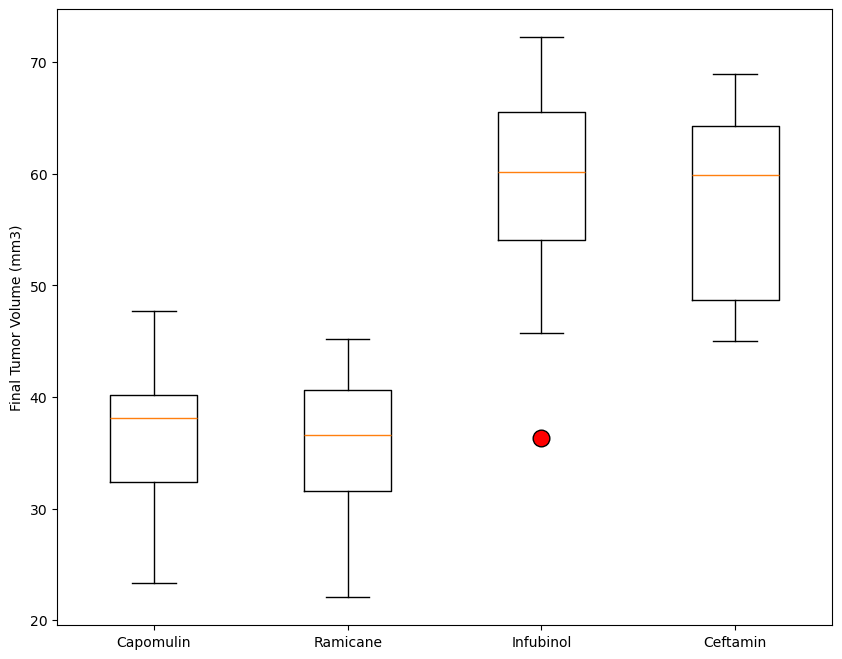

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(10,8))
ax.boxplot(tumor_vol, flierprops={'markerfacecolor': 'red', 'markersize': '12'})
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xticklabels(drug_treatments)

plt.show()




## Line and Scatter Plots

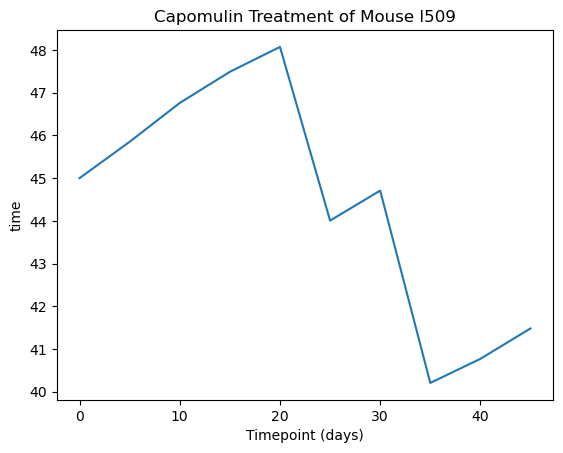

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = clean_df.loc[clean_df["Mouse ID"] == 'l509', :]
plt.plot(mouse['Timepoint'], mouse["Tumor Volume (mm3)"])
plt.xlabel('Timepoint (days)')
plt.ylabel('time')
plt.title("Capomulin Treatment of Mouse l509");
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

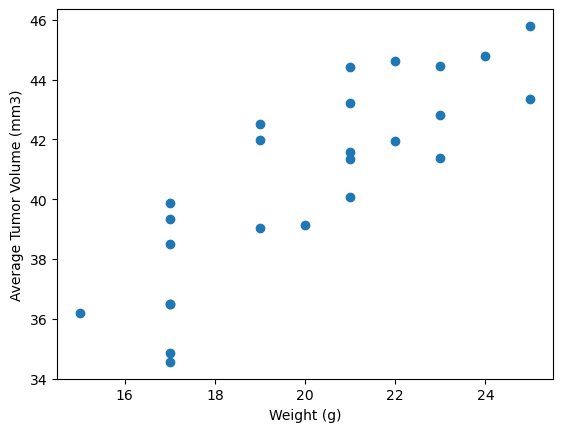

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
weights = Capomulin.groupby('Mouse ID')["Weight (g)"].mean()
vol_avg = Capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
plt.scatter(weights, vol_avg)
plt.xlabel("Weight (g)");
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation coefficient between weight and average tumor volume is 0.84


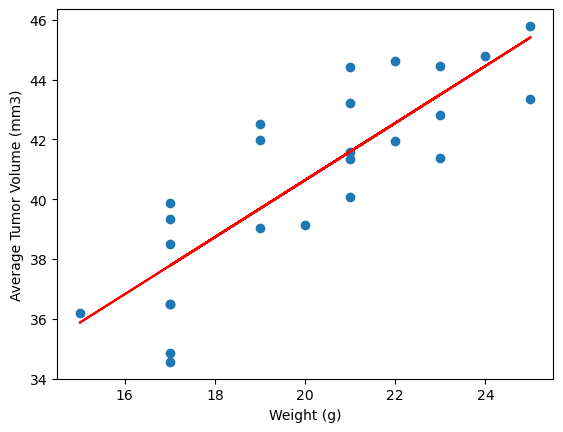

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation coefficient between weight and average tumor volume is {round(st.pearsonr(weights,vol_avg)[0],2)}")
slope, int, r, p, std_err = st.linregress(weights, vol_avg)
regress_values = weights * slope + int
plt.plot(weights,regress_values,"r-")
plt.scatter(weights,vol_avg)
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)');